# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import date

today = date.today()

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q=CITY_NAME&appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.replace("CITY_NAME", city)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass     
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kloulklubed
Processing Record 2 of Set 1 | dzuunmod
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | chingirlau
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | berdigestyakh
Processing Record 8 of Set 1 | batang
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | hassi messaoud
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | espargos
City not found. Skipping...
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | richland
Processing Record 17 of Set 1 | gateway
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processi

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data=city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kloulklubed,7.0419,134.2556,31.28,81,53,5.40,PW,1696133915
1,dzuunmod,48.2199,97.3744,8.73,29,100,1.13,MN,1696133916
2,edinburgh of the seven seas,-37.0676,-12.3116,10.13,69,92,13.79,SH,1696133602
3,chingirlau,51.0950,54.0814,11.66,71,22,3.79,KZ,1696133916
4,waitangi,-43.9535,-176.5597,11.01,79,22,5.81,NZ,1696133583


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kloulklubed,7.0419,134.2556,31.28,81,53,5.40,PW,1696133915
1,dzuunmod,48.2199,97.3744,8.73,29,100,1.13,MN,1696133916
2,edinburgh of the seven seas,-37.0676,-12.3116,10.13,69,92,13.79,SH,1696133602
3,chingirlau,51.0950,54.0814,11.66,71,22,3.79,KZ,1696133916
4,waitangi,-43.9535,-176.5597,11.01,79,22,5.81,NZ,1696133583


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

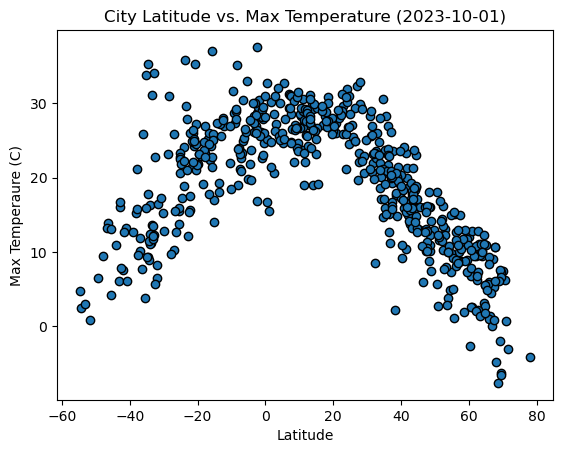

In [14]:
# Build scatter plot for latitude vs. temperature
city_lat = city_data_df["Lat"]
city_temp = city_data_df["Max Temp"]

plt.scatter(city_lat, city_temp, edgecolors='black')

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Max Temperaure (C)')
plt.title(f"City Latitude vs. Max Temperature ({today})")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

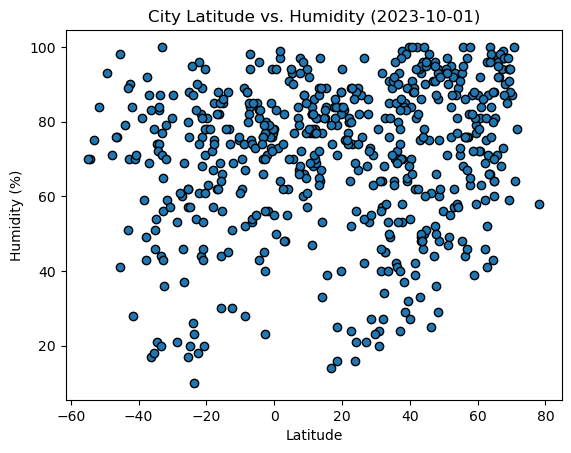

In [15]:
# Build the scatter plots for latitude vs. humidity
city_lat = city_data_df["Lat"]
city_humidity = city_data_df["Humidity"]

plt.scatter(city_lat, city_humidity, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({today})")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

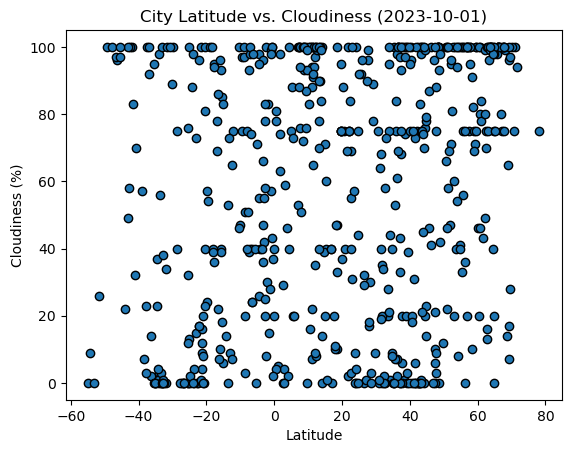

In [16]:
# Build the scatter plots for latitude vs. cloudiness
city_lat = city_data_df["Lat"]
city_cloud = city_data_df["Cloudiness"]

plt.scatter(city_lat, city_cloud, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({today})")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

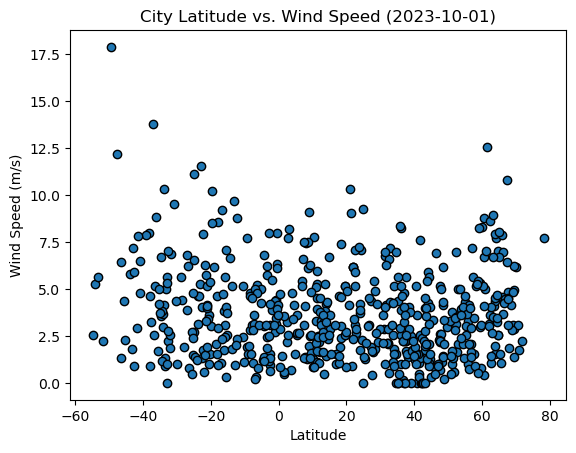

In [17]:
# Build the scatter plots for latitude vs. wind speed
city_lat = city_data_df["Lat"]
city_wind_speed = city_data_df["Wind Speed"]

plt.scatter(city_lat, city_wind_speed, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed ({today})")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    print(line_eq)
    
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

    print(f"The r-value is: {r[0]}")

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kloulklubed,7.0419,134.2556,31.28,81,53,5.40,PW,1696133915
1,dzuunmod,48.2199,97.3744,8.73,29,100,1.13,MN,1696133916
3,chingirlau,51.0950,54.0814,11.66,71,22,3.79,KZ,1696133916
6,berdigestyakh,62.0989,126.6992,9.52,46,49,3.12,RU,1696133917
8,whitehorse,60.7161,-135.0538,6.84,72,100,6.69,CA,1696133595


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,10.13,69,92,13.79,SH,1696133602
4,waitangi,-43.9535,-176.5597,11.01,79,22,5.81,NZ,1696133583
5,port alfred,-33.5906,26.8910,11.21,87,56,0.89,ZA,1696133640
7,batang,-6.4846,110.7083,30.43,53,24,5.20,ID,1696133624
13,port-aux-francais,-49.3500,70.2167,6.56,93,100,17.87,TF,1696133579


###  Temperature vs. Latitude Linear Regression Plot

y = -0.4x + 33.09
The r-value is: -0.8697125247819313


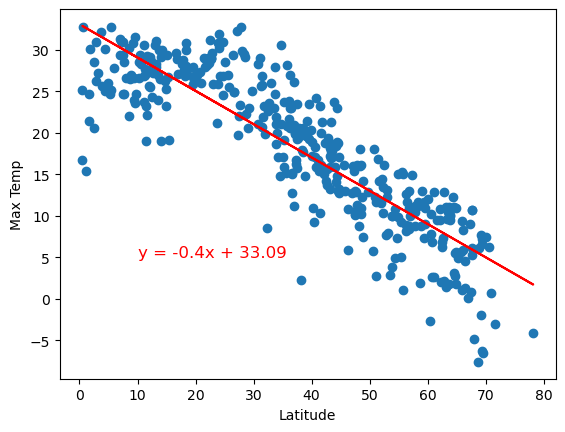

In [34]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, 5))


y = 0.4x + 29.27
The r-value is: 0.7130620366098266


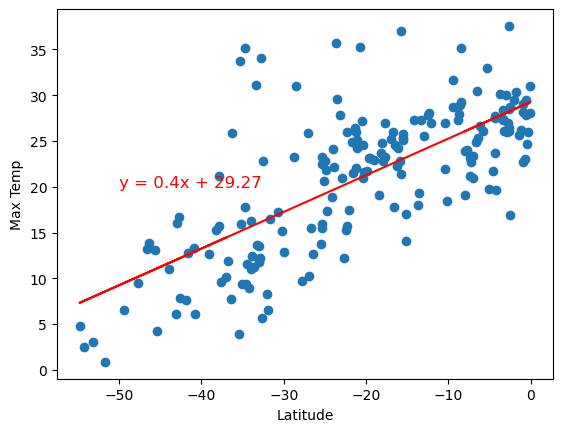

In [33]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For this relationship, there is a strong correlation, where the r-value = -0.82327439786325 (negative correlation) for northern hemisphere cities and 0.7582706054150685 (positive correlation) for southern hemisphere cities

This makes sense because as lattitudes approach 0, these cities are closer to the equator which is why their max temepratures are higher than cities with lower latitudes

### Humidity vs. Latitude Linear Regression Plot

y = 0.1x + 69.24
The r-value is: 0.1021044469652511


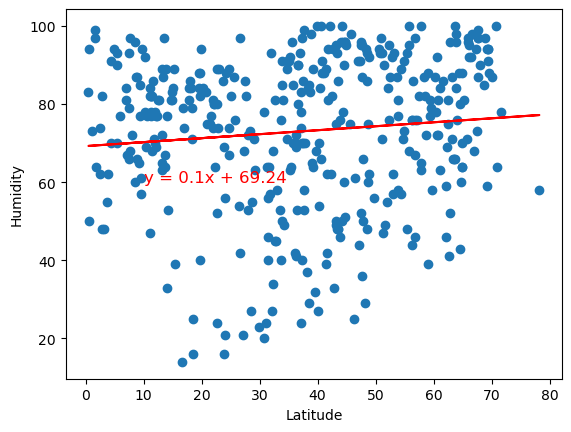

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (10, 60))

y = 0.14x + 69.94
The r-value is: 0.09758652388956364


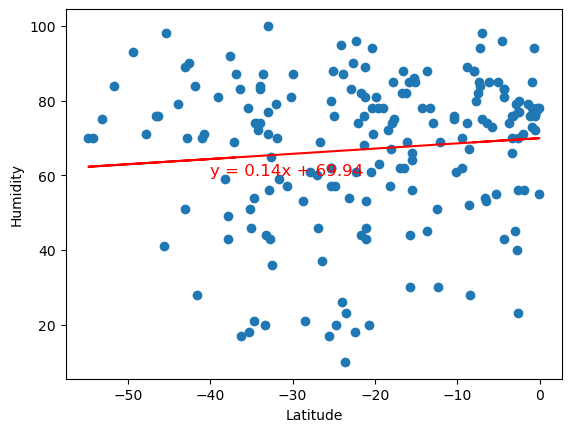

In [31]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-40, 60))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

For this relationship, there is a weak correlation, where the r-value = 0.1021044469652511 (weak positive correlation) for northern hemisphere cities and 0.09758652388956364(very weak positive correlation, almost no correlation) for southern hemisphere cities

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.28x + 49.76
The r-value is: 0.14775845631507523


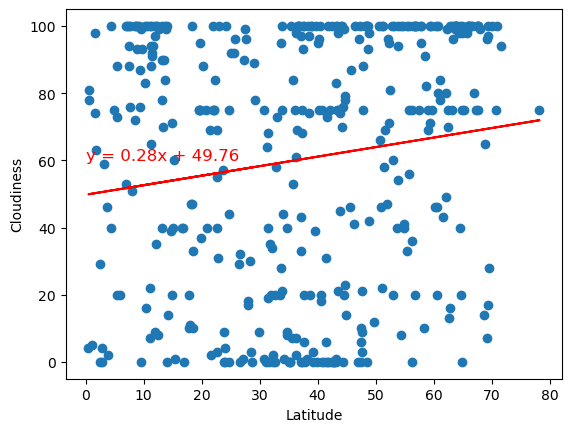

In [29]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (0, 60))

y = 0.3x + 52.36
The r-value is: 0.11055999742138145


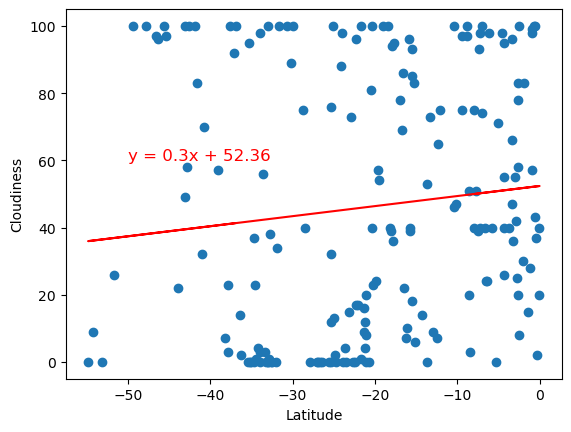

In [26]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 60))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

For this relationship, there is a weak correlation, where the r-value = 0.14775845631507523 (weak positive correlation) for northern hemisphere cities and 0.11055999742138145 (weak positive correlation) for southern hemisphere cities

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x + 3.05
The r-value is: 0.07582382359252753


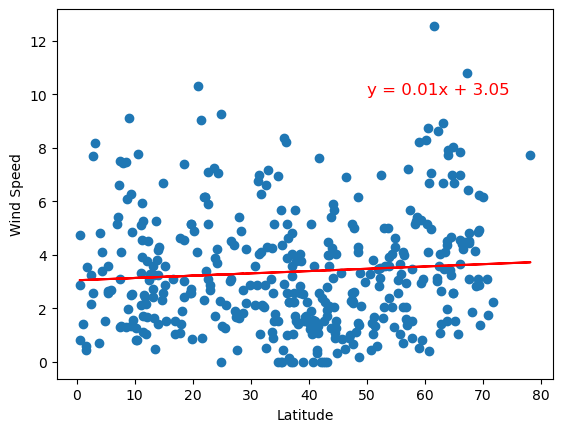

In [27]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (50, 10))

y = -0.04x + 3.24
The r-value is: -0.19885216145230783


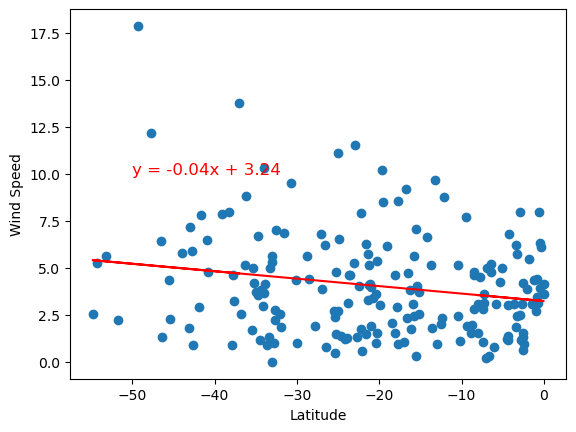

In [28]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For this relationship, there is a weak correlation, where the r-value = 0.07582382359252753 (very weak positive correlation, almost no correlation) for northern hemisphere cities and -0.19885216145230783 (weak negative correlation) for southern hemisphere cities

This makes sense because as lattitudes approach 0, these cities are closer to the equator which is why their humidity levels are higher than cities with lower latitudes